In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(42)
X = np.random.uniform(-3, 3, size=100).reshape(-1, 1)
y = 0.5 * X**3 - X**2 + 2 + np.random.normal(0, 1, size=X.shape)

In [3]:
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

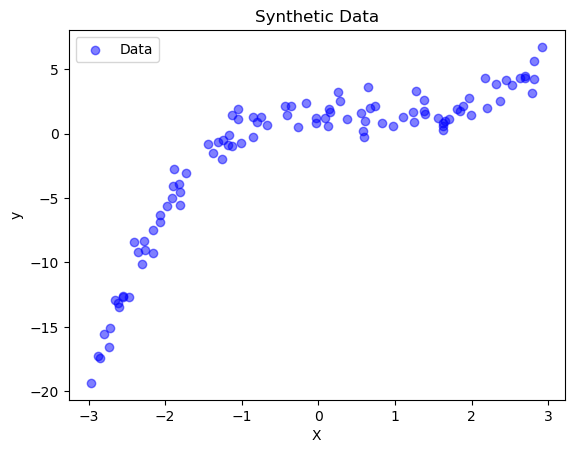

In [4]:
plt.scatter(X, y, color='blue', alpha=0.5, label='Data')
plt.title('Synthetic Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

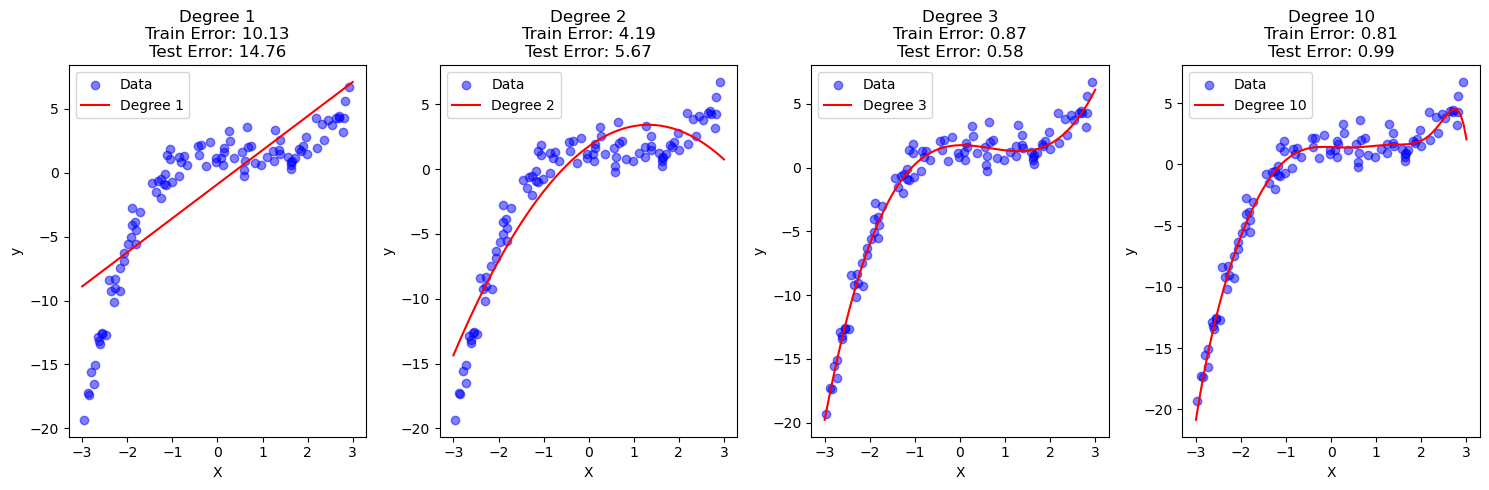

In [5]:
degrees = [1, 2, 3, 10]
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

#prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

#cal errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

#plot
    plt.subplot(1, len(degrees), i + 1)
    plt.scatter(X, y, color='blue', alpha=0.5, label='Data')
    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, color='red', label=f'Degree {degree}')
    plt.title(f'Degree {degree}\nTrain Error: {train_error:.2f}\nTest Error: {test_error:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()

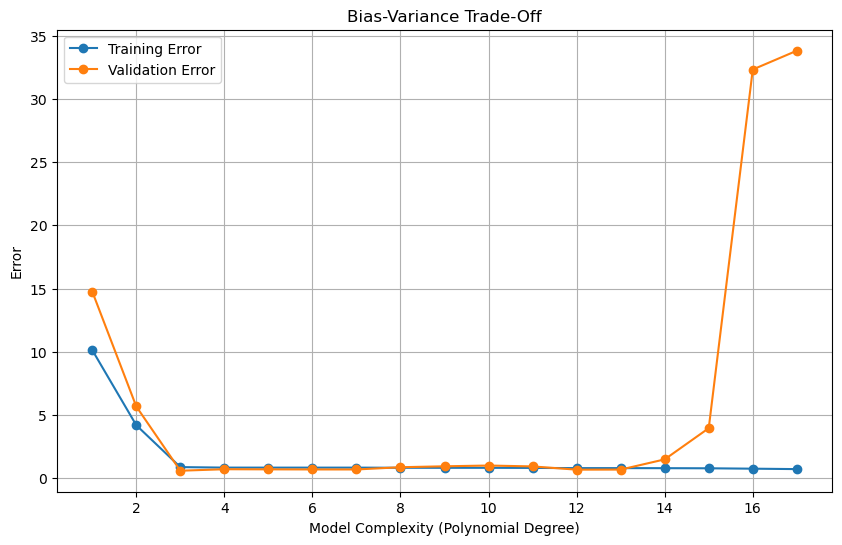

In [8]:
train_errors = []
test_errors = []
degrees = range(1, 18)

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

#cal errors
    train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test)))

#plot
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Validation Error', marker='o')
plt.title('Bias-Variance Trade-Off')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()